<a href="https://colab.research.google.com/github/LordLean/Computer-Vision/blob/master/CV_Labs/CV_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Overview
In this lab we will briefly investigate how we might create binary images and then apply morphological operators to them.

This lab session will all be done by filling in the blanks in this Google Colab sheet.
You'll need a google account to continue, but it's pretty straightforward to sign up if you don't have one already.

The best thing to do would be to save a copy of this notebook in your personal google drive and edit it from there.

# Getting Data
**Getting an image from the web** (for uploading an image file, go to the section "Uploading an image file")

In [1]:
!wget "http://users.sussex.ac.uk/~is321/sad_snowman.jpg" -O sad_snowman.jpg
!wget "https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG" -O meeting_house.jpg
!wget "http://users.sussex.ac.uk/~is321/USbig.png" -O USbig.png

--2020-03-01 12:28:59--  http://users.sussex.ac.uk/~is321/sad_snowman.jpg
Resolving users.sussex.ac.uk (users.sussex.ac.uk)... 139.184.14.119
Connecting to users.sussex.ac.uk (users.sussex.ac.uk)|139.184.14.119|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 395733 (386K) [image/jpeg]
Saving to: ‘sad_snowman.jpg’

sad_snowman.jpg     100%[===================>] 386.46K   110KB/s    in 3.5s    

2020-03-01 12:29:04 (110 KB/s) - ‘sad_snowman.jpg’ saved [395733/395733]

--2020-03-01 12:29:07--  https://upload.wikimedia.org/wikipedia/commons/a/a0/Meeting_House%2C_University_of_Sussex.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1014224 (990K) [image/jpeg]
Saving to: ‘meeting_house.jpg’

meeting_house.jpg   100%[===================>] 990.45K  --.-KB/s    in 0.03s   

# Common Packages
As we've seen before there are some common packages that we might want to load. We should also convert any images we load to RGB from BGR


In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Inserted some magic code to make the figures slightly larger, these numbers can be tweaked
plt.rcParams['figure.figsize'] = [10, 5]

img_ss = cv2.imread('./sad_snowman.jpg')
img_ss = cv2.cvtColor(img_ss, cv2.COLOR_BGR2RGB)

img_mh = cv2.imread('./meeting_house.jpg')
img_mh = cv2.cvtColor(img_mh, cv2.COLOR_BGR2RGB)

# Note that I'm converting directly to gray here!
img_us = cv2.imread('./USbig.png')
img_us = cv2.cvtColor(img_us, cv2.COLOR_BGR2GRAY)

# Let's resize the images to make them a bit smaller! Note the change in order
# of the shape using by the cv2.resize function
# Note that // does integer divison and always rounds down
img_mh = cv2.resize(img_mh, (img_mh.shape[1] // 6, img_mh.shape[0] // 6), interpolation=cv2.INTER_AREA)
img_ss = cv2.resize(img_ss, (img_ss.shape[1] // 8, img_ss.shape[0] // 8), interpolation=cv2.INTER_AREA)


# Uploading an image file
Try uploading custom images as before. **Note** that if you have problems with this, you might need to play play on the cell below again to reload the dialog before trying to upload files.
**Also, for this lab make sure you resize your images so they're not too big** This is because we would need to define some quite different parameters for the filters for them to work well.

In [4]:
from google.colab import files
uploaded = files.upload()

In [0]:
# After executing the cell above, check the uploaded files names 
# and the folder path where your files were uploaded.
import os
!ls
# Insert the correct image filename here and uncomment
#full_path = "/content/" + image_fname
# image = cv2.imread(full_path)

# Creating binary images
As we saw in the lectures, binary images are often created by thresholding an image e.g. saying image >, <, ==, != some_number.

Let's try and create a binary image from the images that we've been given, or provide your own to look at. 

The easiest to binarise is the university of Sussex logo, img_us. The sad snowman is also quite straightforward (use a brightness threshold), and finally we could try finding a structure in the meeting house images based on the color (more difficult).

Whichever image you choose, we'll follow the same steps. Drawing the image, looking at the histogram and trying to figure out how to create a useful binary image. If you want some more ideas on this take a look at this OpenCV [guide](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html)



(300, 400, 3)


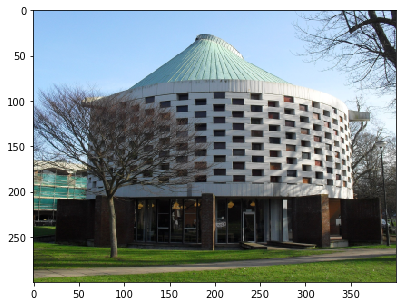

In [22]:
print(img_mh.shape)
plt.imshow(img_mh)

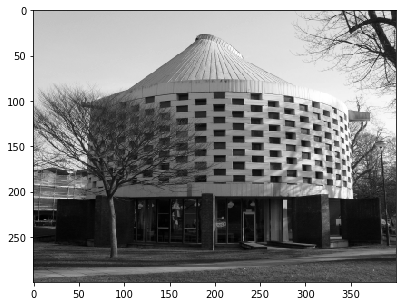

2nd Gray


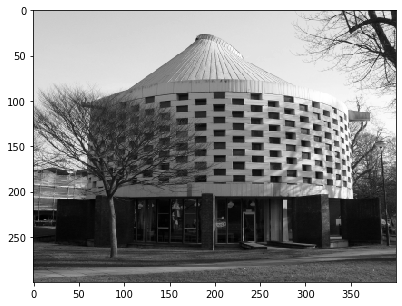

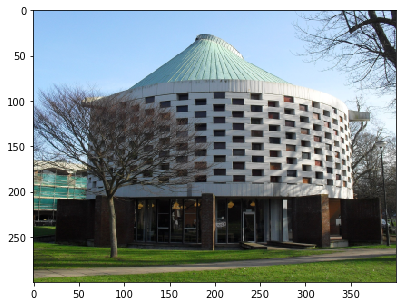

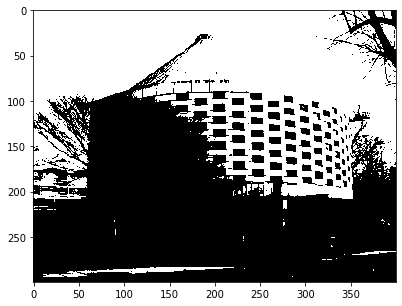

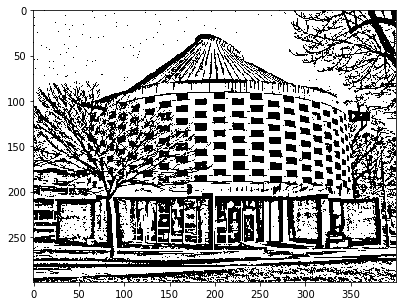

In [46]:
import cv2
# Beginning by plotting the original image. From the image, what looks like a useful structure
# that you could extract by color/intensity alone? Some text? The sky? a building? A snowman?


# How is the chosen image region distinct from everything else? is it brightness?
# in which case we should set a brightness threshold, or is it colour? In which
# case we could set a colour threshold.

# For choosing the specific threshold, it's often helpful to look at the image histogram (remember to flatten the
# array, or reshape to (-1, 3) for colour images)

# Imagine I wanted to find all the Sky pixels, then we could set a threshold on the blue
# channel. We can get just the blue channel of the image by writing img[:,:,2]. If we wanted
# to have a brightness based threshold, then it's easier to convert to gray first.

# Threshold the image

# Draw it (it might be useful to draw the original next to it using subplot)

img_gray = np.mean(img_mh, axis=2)
plt.imshow(img_gray,cmap="gray")
plt.show()

img_gray = cv2.cvtColor(img_mh, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")
print("2nd Gray")
plt.show()

ret, gray = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
plt.imshow(img_mh)
plt.show()
plt.imshow(gray, cmap="gray")
plt.show()

binary2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(binary2, cmap="gray")


# Morphological Operators
Once we've created some interesting binary images, let's try using the morphological operators that we've seen on them. (Erosion, dilation, opening, closing etc.) You can find out more from the OpenCV [documentation](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html). **Make sure the images are in uint8 rather than floating point**. I've provided an example of the sad snowman to start you off, or use the results from the previous section.



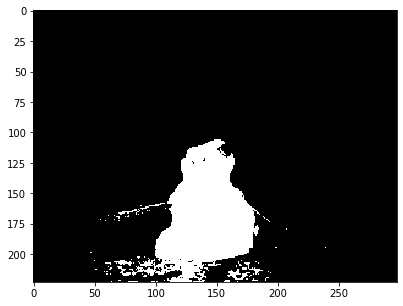

In [49]:
ss_bin = np.uint8(np.mean(img_ss, axis=-1) > 60)
plt.imshow(ss_bin,cmap="gray")

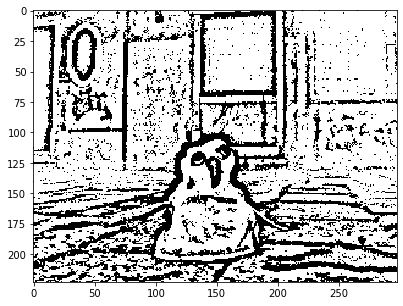

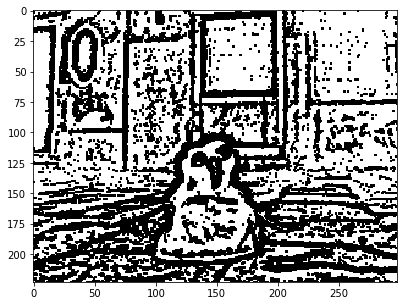

In [73]:
def set_kernel_iterations_erosion(img,xbyx=5,iteration=1):

  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  binary2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
  # or ADAPTIVE_THRESH_GAUSSIAN_C

  kernel = np.ones((xbyx,xbyx),np.uint8)
  erosion = cv2.erode(binary2,kernel,iterations=iteration)

  plt.imshow(binary2,"gray")
  plt.show()
  plt.imshow(erosion,"gray")
  plt.show()


set_kernel_iterations_erosion(img_ss,xbyx=2)

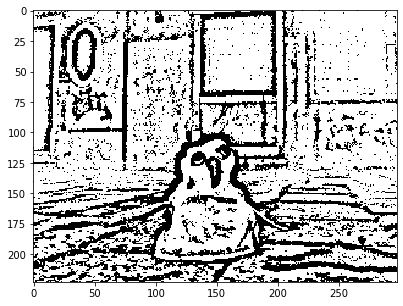

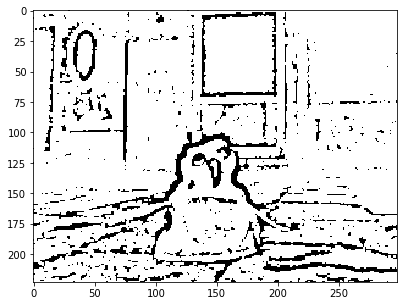

In [85]:
def set_kernel_iterations_dilation(img,xbyx=5,iteration=1):

  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  binary2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
  # or ADAPTIVE_THRESH_GAUSSIAN_C

  kernel = np.ones((xbyx,xbyx),np.uint8)
  erosion = cv2.dilate(binary2,kernel,iterations=iteration)

  plt.imshow(binary2,"gray")
  plt.show()
  plt.imshow(erosion,"gray")
  plt.show()

  return binary2, erosion

noise, noisier = set_kernel_iterations_dilation(img_ss,xbyx=2)

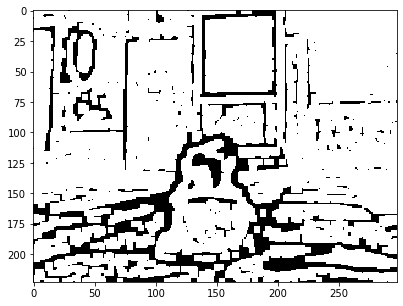

In [87]:
opening = cv2.morphologyEx(noisier, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
plt.imshow(opening, cmap="gray")

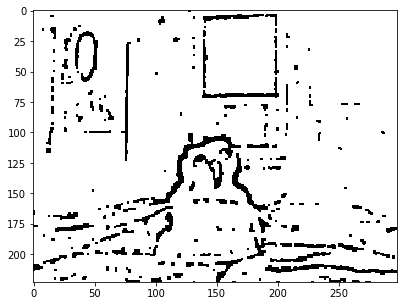

In [91]:
closing = cv2.morphologyEx(noisier, cv2.MORPH_CLOSE, np.ones((2,2),np.uint8))
plt.imshow(closing,"gray")

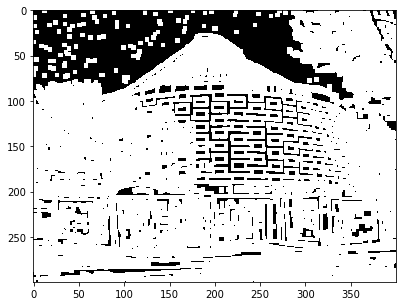

In [92]:
gradient = cv2.morphologyEx(binary2, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient,"gray")

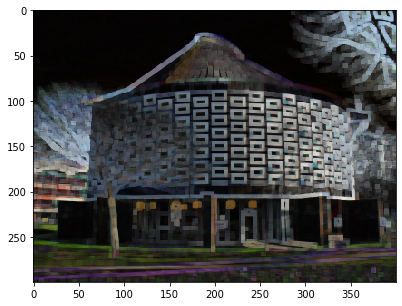

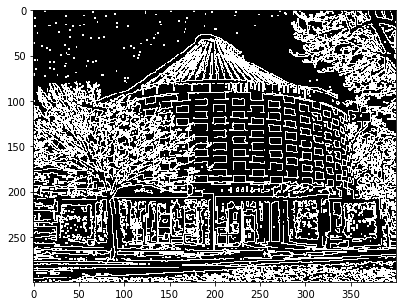

In [96]:
gradient = cv2.morphologyEx(img_mh, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient,"gray")
plt.show()

img_gray = cv2.cvtColor(img_mh, cv2.COLOR_BGR2GRAY)
binary2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
gradient2 = cv2.morphologyEx(binary2,cv2.MORPH_GRADIENT,np.ones((2,2),np.uint8))
plt.imshow(gradient2,"gray")

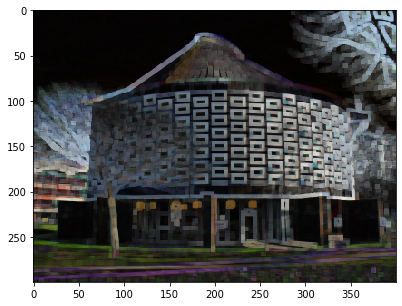

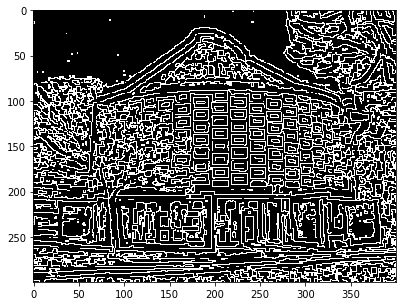

In [97]:
gradient = cv2.morphologyEx(img_mh, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient,"gray")
plt.show()

img_gray = cv2.cvtColor(gradient, cv2.COLOR_BGR2GRAY)
binary2 = cv2.adaptiveThreshold(img_gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
gradient2 = cv2.morphologyEx(binary2,cv2.MORPH_GRADIENT,np.ones((2,2),np.uint8))
plt.imshow(gradient2,"gray")

Top Hat shows difference between input image and opening of that image

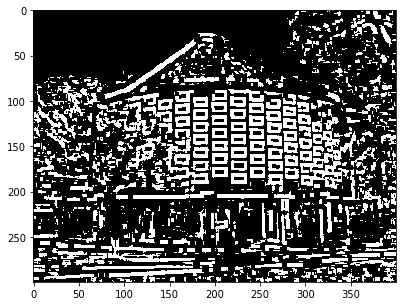

In [100]:
tophat = cv2.morphologyEx(binary2, cv2.MORPH_TOPHAT, kernel)
plt.imshow(tophat,"gray")

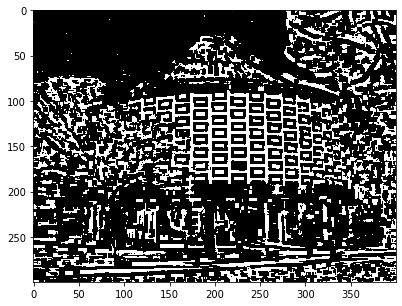

In [101]:
# Blackhat shows diff between closing of input image and input image
blackhat = cv2.morphologyEx(binary2, cv2.MORPH_BLACKHAT, kernel)
plt.imshow(blackhat,"gray")

# Binary Contours
Given a binary image, we can find the contours (bounding polygon) around any of the objects in the image. We can then take measurements about each of the objects etc.

1. Let's begin by finding a good binary image to work with where we have several distinct objects. Either you can choose your own image, or you can use my example of the meeting house. I've included some pre-processing for this so we can have a rough go at counting the number and size of the visible windows. Alternativly, you could look at the Sussex logo and calculate the distibution of areas and perimeters of  the different letters.
2. Calculate and draw the visible image contours. Take a look at the documenation on finding/drawing contours with OpenCV [here](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html). Note that the version of OpenCV in Colab is slightly different from the docs and returns contours, hierarchy = cv2.findContours(...) . Given the set of contours, how many objects are visible in the binary image?
3. Calculate the area/perimeter of the different objects using [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html). Plot the results in a histogram. 
4. For the meeting house image, we could also look at the relationship between object centre in x and the object area. i.e. see how the visible area of windows changes as we go from left to right because of perspective. Use the provided function to calculate the x centroid of an object.


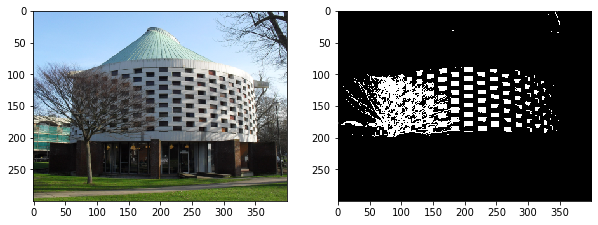

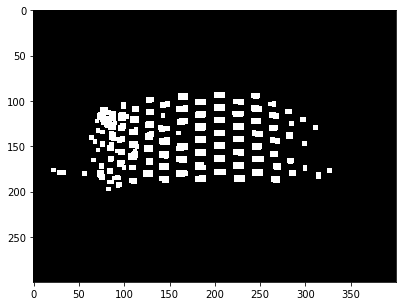

In [104]:
# If you want to use my example of the meeting house, use the code below
# Find all of the darkly coloured pixels
mh_windows = np.uint8(np.mean(img_mh,axis=-1) < 70)
# Ignore everything below pixel 200
mh_windows[200:,...] = 0
# and everything to the right of 350
mh_windows[:, 350:] = 0
plt.subplot(1,2,1)
plt.imshow(img_mh)
plt.subplot(1,2,2)
plt.imshow(mh_windows,"gray")
plt.show()

# Let's tidy the image up with an Open operation.
mh_windows = cv2.morphologyEx(mh_windows, cv2.MORPH_OPEN, np.ones((5,5), dtype=np.uint8))
plt.imshow(mh_windows,"gray")
plt.show()

# Now calculate the image contours

# Draw the image contours in a new image, note that cv2.drawContours overwrites the first argument


# Calculate the area/arcLength of each of the contours and plot the histograms

# Calculate the centre of a contour in the x direction
def calculate_x_centroid(contour):
  M = cv2.moments(contour)
  cx = int(M['m10']/M['m00'])
  return cx



# Extensions
You don't have to do these, but if you complete the lab and want to learn more then give these a go! You also don't need to do them in any particular order.

+ Try converting the image to a different colour space such as LAB using cv2.cvtColor. LAB separates brightness and colour and will probably be easier to extract objects by colour. Try and extract different objects.
+ As in Lab 3, try either adding noise to the image or looking at a very noisy photo and then try creating a binary image from it? Do you need to change any of your porcessing steps to get similar results?


